<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/VAE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#source:https://darektidwell.com/using-selenium-with-google-colaboratory/
# Install cromium, its driver, and selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Set options to be headless
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

     |████████████████████████████████| 911kB 2.8MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install google_images_download

  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=c3b9aa7c7b9e4c478da97cd150cc82b87a2d8e6f69ae37a2610d5e1247ae9bd1
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download
import os

In [0]:
data_path = '/content/drive/My Drive/downloads'
data_path
os.chdir(data_path)

In [0]:
#creating object
response = google_images_download.googleimagesdownload()

search_queries = ['men hairstyle front']

In [0]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1500,
                    format='jpg',
                    size = 'medium',
                    chromedriver= '/usr/lib/chromium-browser/chromedriver',
                    aspect_ratio='square',
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    size = 'medium',     
                    aspect_ratio='square',
                    print_urls=False)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [11]:
# Driver Code 

download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1500 could not be downloaded because some images were not downloadable. 608 is all we got for this search filter!


FileNotFoundError: ignored

In [0]:
#dependencies (numpy, matplotlib, and keras)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
from keras.datasets import mnist

In [123]:
#hyperparameters
batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
nb_epoch = 5
epsilon_std = 1.0

#encoder
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

print(z_mean)
print(z_log_var)

Tensor("dense_79/BiasAdd:0", shape=(100, 2), dtype=float32)
Tensor("dense_80/BiasAdd:0", shape=(100, 2), dtype=float32)


In [124]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

#latent hidden state
print(z)

Tensor("lambda_13/add:0", shape=(100, 2), dtype=float32)


In [125]:
#decoder
# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

print(x_decoded_mean)

Tensor("dense_82/Sigmoid:0", shape=(100, 784), dtype=float32)


In [129]:
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (100, 784)           0                                            
__________________________________________________________________________________________________
dense_78 (Dense)                (100, 256)           200960      input_14[0][0]                   
__________________________________________________________________________________________________
dense_79 (Dense)                (100, 2)             514         dense_78[0][0]                   
__________________________________________________________________________________________________
dense_80 (Dense)                (100, 2)             514         dense_78[0][0]                   
__________________________________________________________________________________________________
lambda_13 

In [0]:
#loss
def vae_loss(x, x_decoded_mean):
    xent_loss = original_dim * objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

vae = Model(x, x_decoded_mean)
vae.compile(optimizer='rmsprop', loss=vae_loss)

In [133]:
784 * objectives.binary_crossentropy(x,x_decoded_mean)

<tf.Tensor 'mul_5:0' shape=(100,) dtype=float32>

In [134]:
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
kl_loss

<tf.Tensor 'mul_6:0' shape=(100,) dtype=float32>

In [127]:
# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [128]:
vae.fit(x_train, x_train,
        shuffle=False,
        nb_epoch=nb_epoch,
        batch_size=batch_size,
        validation_data=(x_test, x_test),verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 191.2372 - val_loss: 176.4160
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 171.2321 - val_loss: 170.5814
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 167.9772 - val_loss: 168.1167
Epoch 4/5
60000/60000 [==============================] - 4s 59us/step - loss: 165.9635 - val_loss: 166.4236
Epoch 5/5
60000/60000 [==============================] - 4s 59us/step - loss: 164.5303 - val_loss: 165.3298


(784,)

In [130]:
result_imgs = vae.predict(x_test, batch_size = 100, verbose=1)


10000/10000 [==============================] - 1s 94us/step


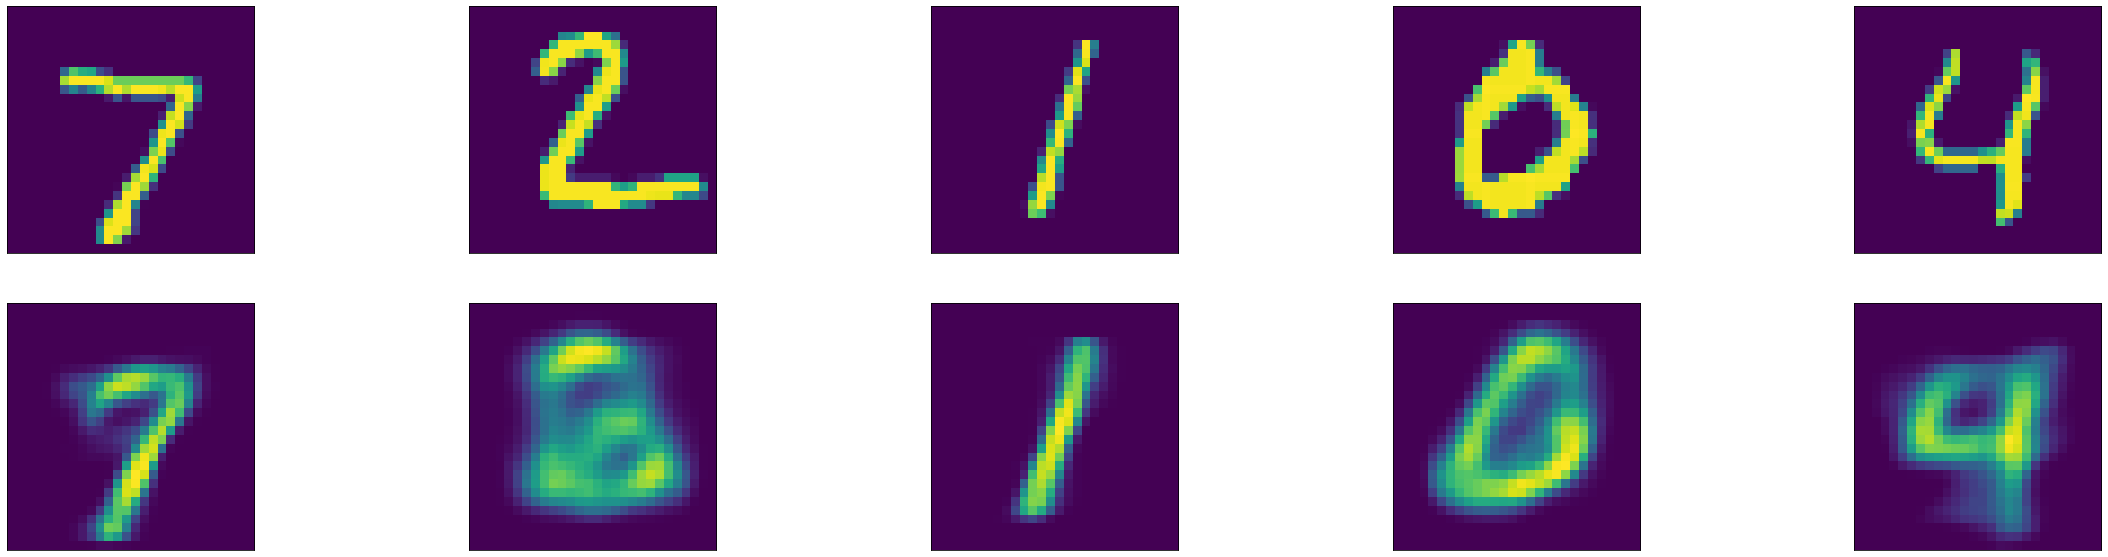

In [131]:
import matplotlib.pyplot as plt

n = 5  # how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_imgs[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [179]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Flatten, Lambda, Reshape
from keras.models import Model
from keras import backend as K


original_dim = 9216
latent_dim = 2



input_img = Input(shape=(96,96,1))  # adapt this if using `channels_first` image data format


x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

shape_before_flattening = K.int_shape(x)

x = Flatten()(x)
x = Dense(32, activation='relu')(x)


#Tow outputs, latent mean and (log) variance
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

print(z_mean)
print(z_log_var)


Tensor("dense_110/BiasAdd:0", shape=(?, 2), dtype=float32)
Tensor("dense_111/BiasAdd:0", shape=(?, 2), dtype=float32)


In [0]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(1,2), mean=0., stddev = 1.)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling)([z_mean, z_log_var])



In [181]:
print(z)

Tensor("lambda_17/add:0", shape=(?, 2), dtype=float32)


In [182]:
shape_before_flattening[1:]

(24, 24, 32)

In [0]:
x = Dense(32, activation='relu')(z)
#Expand to 9216 total pixels
x = Dense(18432, activation='relu')(x)

#Reshape
x = Reshape(shape_before_flattening[1:])(x)


#Decoder
x = Conv2DTranspose(32, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = UpSampling2D((2,2))(x)
z_decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)



In [0]:
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(z_log_var) + K.square(z_mean) - 1. - z_log_var, axis=1)
    
    return recon + kl


In [191]:
vae = Model(input_img, z_decoded)
vae.compile(optimizer='rmsprop', loss=vae_loss)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 96, 96, 1)    0                                            
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 96, 96, 32)   320         input_21[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_51 (MaxPooling2D) (None, 48, 48, 32)   0           conv2d_75[0][0]                  
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 48, 48, 32)   9248        max_pooling2d_51[0][0]           
__________________________________________________________________________________________________
max_poolin

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Input, Dense, Flatten,Conv2D, ZeroPadding2D, MaxPooling2D, Dropout, UpSampling2D # Import hidden layer
from keras.optimizers import Adam #For Optimizing the Neural Network
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K

In [0]:
men_hair = "/content/drive/My Drive/downloads/"
women_hair = "/content/drive/My Drive/downloads/"

img_all_train = glob(men_hair+"/man hairstyle top view/train/*.jpg")
img_all_train += glob(women_hair+"women hairstyle top view/train/*.jpg") 

img_all_test = glob(men_hair+"/man hairstyle top view/test/*.jpg")
img_all_test += glob(women_hair+"women hairstyle top view/test/*.jpg") 


In [11]:
#source:https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution
# Preparing train, test data


train_data = []
test_data = []

#Train
for img in img_all_train:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
   
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    train_data.append(img)
    
#Test                      
for img in img_all_test:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
    
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    test_data.append(img)
    

train_data = np.array(train_data)
test_data = np.array(test_data)

print("Total number of train examples: ", train_data.shape)
print("Total number of test examples:", test_data.shape)

Total number of train examples:  (857, 96, 96, 1)
Total number of test examples: (263, 96, 96, 1)


In [199]:
vae.fit(train_data, train_data,
        shuffle=False,
        epochs=20,
        steps_per_epoch=50,
        validation_steps=16,
        validation_data=(test_data,test_data),verbose=1)

Train on 857 samples, validate on 263 samples
Epoch 1/20
50/50 [==============================] - 30s 602ms/step - loss: 69.0305 - val_loss: 64.1080
Epoch 2/20
50/50 [==============================] - 30s 600ms/step - loss: 66.2972 - val_loss: 64.5899
Epoch 3/20
50/50 [==============================] - 30s 600ms/step - loss: 65.1170 - val_loss: 65.5137
Epoch 4/20
50/50 [==============================] - 30s 600ms/step - loss: 64.0586 - val_loss: 67.5318
Epoch 5/20
50/50 [==============================] - 30s 600ms/step - loss: 62.8189 - val_loss: 62.3805
Epoch 6/20
50/50 [==============================] - 30s 599ms/step - loss: 62.1831 - val_loss: 65.8813
Epoch 7/20
50/50 [==============================] - 30s 599ms/step - loss: 61.5421 - val_loss: 61.5808
Epoch 8/20
50/50 [==============================] - 30s 598ms/step - loss: 61.5227 - val_loss: 60.6603
Epoch 9/20
50/50 [==============================] - 30s 598ms/step - loss: 61.1158 - val_loss: 62.4938
Epoch 10/20
50/50 [========

In [200]:
result_imgs1 = vae.predict(test_data, batch_size = 1, verbose=1)


263/263 [==============================] - 1s 3ms/step


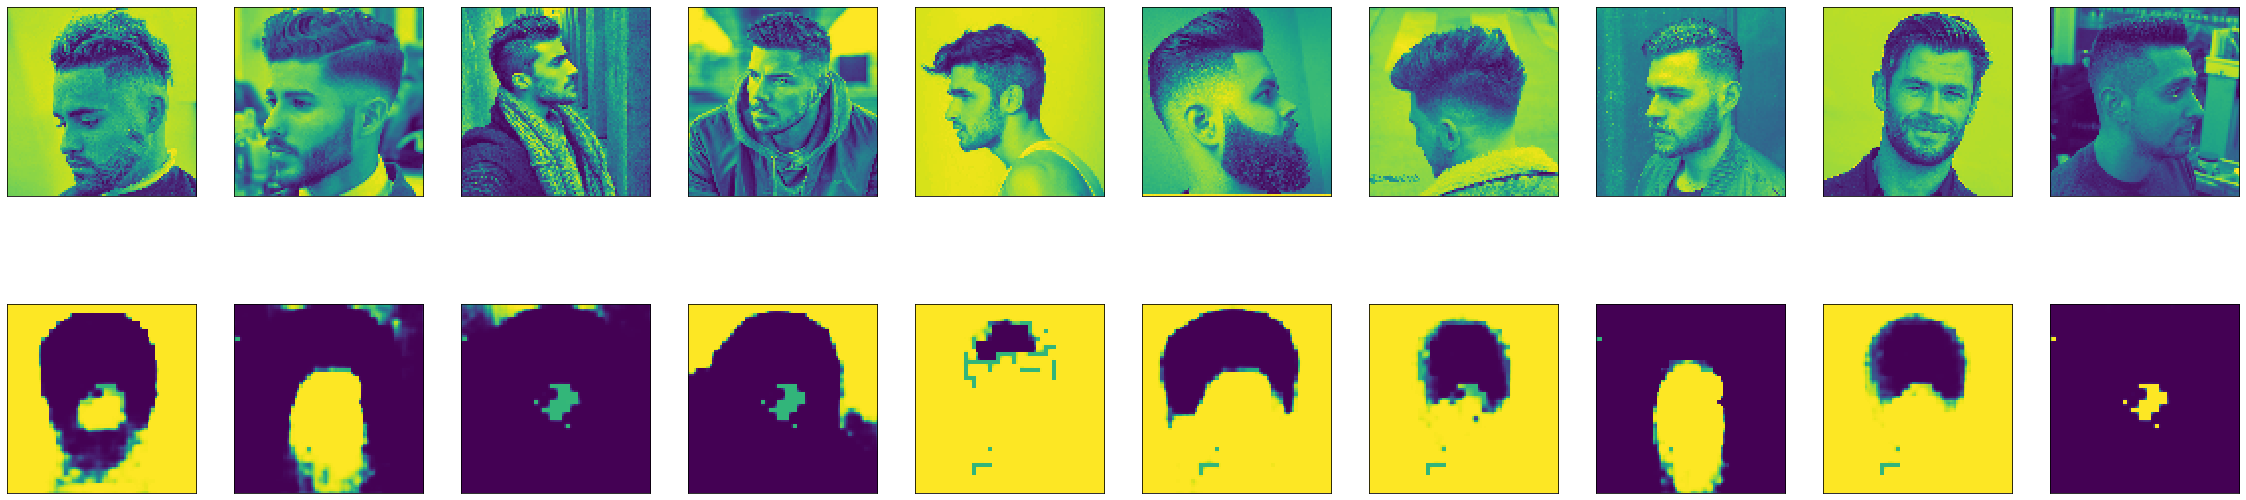

In [201]:
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_imgs1[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()